## COMP90055 Project Info:

### Project Title: Machine Learning for Feritility Prediction
### Student Name: Yiming Zhang
### Student ID: 889262

## Library

In [1]:
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from pandas import ExcelWriter
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Delete data function

In [2]:
def delete_data(input_data):
    """
    Delete the target attributes
    :param input_data: data set
    :return: a data set which has no empty attributes
    """
    # delete the outcome attributes
    input_data.drop('Amen_ST60', axis=1, inplace=True)
    input_data.drop('AmenST36', axis=1, inplace=True)
    input_data.drop('AmenST48', axis=1, inplace=True)
    input_data.drop('target', axis=1, inplace=True)

    # delete the attributes related to "Amen"
    input_data.drop('Amen_ST12', axis=1, inplace=True)
    input_data.drop('Amen_ST24', axis=1, inplace=True)
    input_data.drop('Amen_ST3', axis=1, inplace=True)
    input_data.drop('Amen_ST6', axis=1, inplace=True)
    return input_data

## Drop data function

In [3]:
def drop_data(input_data):
    """
       Drop the columns where all at least three elements are non-null
       :param input_data: data set
       :return: processed data set
    """
    input_data = input_data.dropna(axis=1, thresh=3)
    return input_data


## Feature scale function

In [4]:
def feature_scale(input_data):
    """
        Feature scaling
        :param input_data: data set
        :return: processed data set
    """
    scale = StandardScaler()
    input_data = scale.fit_transform(input_data)

    return input_data

## Evaluation function

In [5]:
def print_classification_report(classifier, train_data, target_data, num_validations):
    """
        print classification report
        :param: classifier, training data, target data, number of validations
        :return: print classification report
    """
    accuracy = cross_val_score(classifier, train_data, target_data, scoring='accuracy', cv=num_validations)
    print("Accuracy: " + str(round(accuracy.mean(), 4)))

    precision = cross_val_score(classifier, train_data, target_data, scoring='precision_weighted', cv=num_validations)
    print("Precision: " + str(round(precision.mean(), 4)))

    recall = cross_val_score(classifier, train_data, target_data, scoring='recall_weighted', cv=num_validations)
    print("Recall: " + str(round(recall.mean(), 4)))

    f1 = cross_val_score(classifier, train_data, target_data, scoring='f1_weighted', cv=num_validations)
    print("F1: " + str(round(f1.mean(), 4)))

    auc = cross_val_score(classifier, train_data, target_data, scoring='roc_auc', cv=num_validations)
    print("AUC: " + str(round(auc.mean(), 4)))



## Plot learning curve function

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## Load data

In [7]:
data = pd.read_excel('dataSet.xlsx')
df = pd.DataFrame(data)
df

,Age_diagnosis,Agediag_category,Race,BMIclass_T0,SmokingST,SmokingST_cat3,Alcohol_T0,Alcohol<2/perday_T0,Alcohol>2/perday_T0,AFC_T0,...,AmenST48,Amen_ST60,BCrecurrence,Relapse_type,Relapse_local,Relapse_regional,Distant_m,Contralateral_bc,Secondary_Br_ca,Secondary_ca
0,NaN,0.0,3.0,1.0,0.0,NaN,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.0,3.0,2.0,0.0,NaN,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1.0,3.0,2.0,0.0,NaN,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.0,3.0,4.0,0.0,NaN,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,3.0,1.0,0.0,NaN,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,1.0,3.0,2.0,0.0,NaN,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1.0,3.0,3.0,0.0,NaN,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.0,3.0,3.0,0.0,NaN,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.0,3.0,2.0,0.0,NaN,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,0.0,3.0,4.0,0.0,NaN,1.0,1.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Original dataset shape

In [8]:
print(df.shape)

(7476, 134)


## Target featrue

In [9]:
df = df.dropna(subset=['Amen_ST60', 'AmenST36', 'AmenST48'], how='all')

df['target'] = 0
for index in df.index:
    if df.at[index, 'Amen_ST60'] == 1.0 or df.at[index, 'AmenST36'] == 1.0 or df.at[index, 'AmenST48'] == 1.0:
        df.at[index, 'target'] = 1
    else:
        df.at[index, 'target'] = 0

target = df[['target']]
target.head(10)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,target
280,1
281,1
282,0
283,1
284,1
285,0
286,0
287,1
288,0
289,1


## Delete irrelevant data

In [10]:
df = delete_data(df)
print(df.isnull().sum())
print(df.shape)
df.head(10)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Age_diagnosis              0
Agediag_category           0
Race                     937
BMIclass_T0              695
SmokingST                862
SmokingST_cat3           862
Alcohol_T0               920
Alcohol<2/perday_T0      992
Alcohol>2/perday_T0      992
AFC_T0                   960
AMH_T0                   939
FSH_T0                   938
LH_T0                    992
InhB_T0                  938
E2_T0                    992
Ovvol_T0                 960
Prg_evr                  860
Prg1_age                 990
Prevpregnancies_T0       937
No.LiveBirths            860
LiveBirths_flg           860
H/Miscarriage            937
No.Misscarriages         937
Therapeutic_abortion     992
Preg_PostCA              297
preg_postca_no.          992
chemo-preg1              992
chemo-preg2              992
chemo-preg3              992
chemo-preg4              992
                        ... 
OtherChemo_Cycles        954
CT_Duration              700
CTDuration_string        916
Chemo_dosedens

,Age_diagnosis,Agediag_category,Race,BMIclass_T0,SmokingST,SmokingST_cat3,Alcohol_T0,Alcohol<2/perday_T0,Alcohol>2/perday_T0,AFC_T0,...,CRA,CRM,BCrecurrence,Relapse_type,Relapse_local,Relapse_regional,Distant_m,Contralateral_bc,Secondary_Br_ca,Secondary_ca
280,42.134247,0.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
281,44.723288,0.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
282,41.372603,0.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283,42.649315,0.0,1.0,3.0,1.0,1.0,NaN,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,37.638356,1.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,50.126027,0.0,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,28.808219,1.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,14.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287,50.454795,0.0,1.0,4.0,0.0,0.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288,31.956164,1.0,1.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,51.408219,0.0,1.0,4.0,0.0,0.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop empty features 

In [11]:
df = drop_data(df)
print(df.isnull().sum())
print(df.shape)
df.head(10)

Age_diagnosis           0
Agediag_category        0
Race                  937
BMIclass_T0           695
SmokingST             862
SmokingST_cat3        862
Alcohol_T0            920
AFC_T0                960
AMH_T0                939
FSH_T0                938
InhB_T0               938
Ovvol_T0              960
Prg_evr               860
Prevpregnancies_T0    937
No.LiveBirths         860
LiveBirths_flg        860
H/Miscarriage         937
No.Misscarriages      937
Preg_PostCA           297
Menarcheage           937
Mens_cycle            941
BC_histology          750
BC_grade              753
Invasiveness_flg      255
BC_stage              915
Tumor_Size            168
Nodal_Status          325
ER_Status             202
PR_Status             806
HER2_status           769
                     ... 
Chemo_Cat              13
AC                    177
AC_Cycles             969
CMF                   179
CMF_Cycles            433
AC+CMF                179
AC+T                  179
Taxel       

,Age_diagnosis,Agediag_category,Race,BMIclass_T0,SmokingST,SmokingST_cat3,Alcohol_T0,AFC_T0,AMH_T0,FSH_T0,...,ChemoNW,D/m2/wk,TD,TD/wk,TAM_flg,HT_flg,HT_type,GnRHa_flg,LHRH_Amen,Duration_Amen
280,42.134247,0.0,1.0,3.0,0.0,0.0,NaN,NaN,5.731443,10.5239,...,18.0,200,6132.971827,340.721,NaN,NaN,NaN,NaN,NaN,NaN
281,44.723288,0.0,1.0,3.0,0.0,0.0,NaN,3.0,7.429156,10.0163,...,16.0,300,8609.977649,538.124,NaN,NaN,NaN,NaN,NaN,NaN
282,41.372603,0.0,1.0,2.0,0.0,0.0,NaN,6.0,15.653370,6.17441,...,18.0,250,7696.830718,427.602,NaN,NaN,NaN,NaN,NaN,NaN
283,42.649315,0.0,1.0,3.0,1.0,1.0,NaN,5.0,NaN,14.0572,...,18.0,250,8856.639928,492.036,NaN,NaN,NaN,NaN,NaN,NaN
284,37.638356,1.0,1.0,2.0,0.0,0.0,NaN,6.5,4.925377,17.2614,...,12.0,250,4344.228472,362.019,NaN,NaN,NaN,NaN,NaN,NaN
285,50.126027,0.0,1.0,3.0,1.0,2.0,NaN,NaN,2.455228,NaN,...,NaN,,0.000000,,NaN,NaN,NaN,NaN,NaN,NaN
286,28.808219,1.0,1.0,2.0,0.0,0.0,NaN,14.5,46.804600,2.35701,...,12.0,200,3933.678109,327.807,NaN,NaN,NaN,NaN,NaN,NaN
287,50.454795,0.0,1.0,4.0,0.0,0.0,NaN,2.0,0.357150,27.9446,...,12.0,250,5894.012076,491.168,NaN,NaN,NaN,NaN,NaN,NaN
288,31.956164,1.0,1.0,4.0,0.0,0.0,NaN,NaN,15.043944,5.52936,...,24.0,200,9093.883486,378.912,NaN,NaN,NaN,NaN,NaN,NaN
289,51.408219,0.0,1.0,4.0,0.0,0.0,NaN,2.0,0.376836,11.2998,...,NaN,,0.000000,,NaN,NaN,NaN,NaN,NaN,NaN


## Convert categorical data to float data

In [12]:
# convert FSH_T0 to float type
df[['FSH_T0']] = df.FSH_T0.astype(float)

# convert CT_Duration to float type
for index in df.index:
    if df.at[index, 'CT_Duration'] == "> 64":
        df.at[index, 'CT_Duration'] = 65.0
    if df.at[index, 'CT_Duration'] == "<= 64":
        df.at[index, 'CT_Duration'] = 63.0
    if df.at[index, 'CT_Duration'] == " ":
        df.at[index, 'CT_Duration'] = 0.0
df[['CT_Duration']] = df.CT_Duration.astype(float)

# convert TD/wk to float type
for index in df.index:
    if df.at[index, 'TD/wk'] == " ":
        df.at[index, 'TD/wk'] = 0.0
df[['TD/wk']] = df[['TD/wk']].astype(float)

# convert category feature to numerical feature
df = pd.get_dummies(df)
print(df.shape)

# convert all string type to float type in order to feature scale
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

df.head(10)

(992, 260)


,Age_diagnosis,Agediag_category,Race,BMIclass_T0,SmokingST,SmokingST_cat3,Alcohol_T0,AFC_T0,AMH_T0,FSH_T0,...,D/m2/wk_,TAM_flg_0,TAM_flg_1,HT_flg_0,HT_flg_1,HT_type_0,HT_type_1,HT_type_3,GnRHa_flg_0,GnRHa_flg_1
280,42.134247,0.0,1.0,3.0,0.0,0.0,NaN,NaN,5.731443,10.523935,...,0,0,0,0,0,0,0,0,0,0
281,44.723288,0.0,1.0,3.0,0.0,0.0,NaN,3.0,7.429156,10.016288,...,0,0,0,0,0,0,0,0,0,0
282,41.372603,0.0,1.0,2.0,0.0,0.0,NaN,6.0,15.653370,6.174413,...,0,0,0,0,0,0,0,0,0,0
283,42.649315,0.0,1.0,3.0,1.0,1.0,NaN,5.0,NaN,14.057161,...,0,0,0,0,0,0,0,0,0,0
284,37.638356,1.0,1.0,2.0,0.0,0.0,NaN,6.5,4.925377,17.261431,...,0,0,0,0,0,0,0,0,0,0
285,50.126027,0.0,1.0,3.0,1.0,2.0,NaN,NaN,2.455228,NaN,...,1,0,0,0,0,0,0,0,0,0
286,28.808219,1.0,1.0,2.0,0.0,0.0,NaN,14.5,46.804600,2.357015,...,0,0,0,0,0,0,0,0,0,0
287,50.454795,0.0,1.0,4.0,0.0,0.0,NaN,2.0,0.357150,27.944606,...,0,0,0,0,0,0,0,0,0,0
288,31.956164,1.0,1.0,4.0,0.0,0.0,NaN,NaN,15.043944,5.529362,...,0,0,0,0,0,0,0,0,0,0
289,51.408219,0.0,1.0,4.0,0.0,0.0,NaN,2.0,0.376836,11.299822,...,1,0,0,0,0,0,0,0,0,0


## Fill null with feature's mean value

In [13]:
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())
df.head(10)

Age_diagnosis                            0
Agediag_category                         0
Race                                     0
BMIclass_T0                              0
SmokingST                                0
SmokingST_cat3                           0
Alcohol_T0                               0
AFC_T0                                   0
AMH_T0                                   0
FSH_T0                                   0
InhB_T0                                  0
Ovvol_T0                                 0
Prg_evr                                  0
LiveBirths_flg                           0
H/Miscarriage                            0
No.Misscarriages                         0
Preg_PostCA                              0
Invasiveness_flg                         0
Nodal_Status                             0
ER_Status                                0
PR_Status                                0
HER2_status                              0
Chemo_Cat                                0
AC         

,Age_diagnosis,Agediag_category,Race,BMIclass_T0,SmokingST,SmokingST_cat3,Alcohol_T0,AFC_T0,AMH_T0,FSH_T0,...,D/m2/wk_,TAM_flg_0,TAM_flg_1,HT_flg_0,HT_flg_1,HT_type_0,HT_type_1,HT_type_3,GnRHa_flg_0,GnRHa_flg_1
280,42.134247,0.0,1.0,3.0,0.0,0.0,0.652778,5.0625,5.731443,10.523935,...,0,0,0,0,0,0,0,0,0,0
281,44.723288,0.0,1.0,3.0,0.0,0.0,0.652778,3.0000,7.429156,10.016288,...,0,0,0,0,0,0,0,0,0,0
282,41.372603,0.0,1.0,2.0,0.0,0.0,0.652778,6.0000,15.653370,6.174413,...,0,0,0,0,0,0,0,0,0,0
283,42.649315,0.0,1.0,3.0,1.0,1.0,0.652778,5.0000,8.186732,14.057161,...,0,0,0,0,0,0,0,0,0,0
284,37.638356,1.0,1.0,2.0,0.0,0.0,0.652778,6.5000,4.925377,17.261431,...,0,0,0,0,0,0,0,0,0,0
285,50.126027,0.0,1.0,3.0,1.0,2.0,0.652778,5.0625,2.455228,9.550646,...,1,0,0,0,0,0,0,0,0,0
286,28.808219,1.0,1.0,2.0,0.0,0.0,0.652778,14.5000,46.804600,2.357015,...,0,0,0,0,0,0,0,0,0,0
287,50.454795,0.0,1.0,4.0,0.0,0.0,0.652778,2.0000,0.357150,27.944606,...,0,0,0,0,0,0,0,0,0,0
288,31.956164,1.0,1.0,4.0,0.0,0.0,0.652778,5.0625,15.043944,5.529362,...,0,0,0,0,0,0,0,0,0,0
289,51.408219,0.0,1.0,4.0,0.0,0.0,0.652778,2.0000,0.376836,11.299822,...,1,0,0,0,0,0,0,0,0,0


## Split training data and target data

In [14]:
# df = pd.DataFrame(df).reset_index()
# X is the training data, y is the target data

X = df
# convert column to row
y = target.values.ravel()

# delete index column
# X = X.drop('index',1)

## Feature selection (Chi-square)

In [15]:
# feature selection: uses chi-square to select best k features
# selector = SelectKBest(score_func=chi2, k='all')
selector = SelectKBest(score_func=chi2, k=50)
# selector = SelectKBest(score_func=chi2, k=100)
# selector = SelectKBest(score_func=chi2, k=200)
selector.fit(X, y)
X_new = selector.transform(X)

print(X_new.shape)
print(X_new)
# scores
scores = selector.scores_
print(len(scores))
print(len(X.columns))
# attributes names of the k highest chi square scores
vector_names = list(X.columns[selector.get_support(indices=True)])
print(vector_names[:100])
print(len(vector_names))

chi2_scores = list(zip(X.columns, scores))
chi2_scores.sort(reverse=True, key=lambda x: x[1])
print(chi2_scores)
# pd.DataFrame(chi2_scores).to_excel('new_chi2.xlsx', header=False, index=False)


(992, 50)
[[42.13424658  0.          5.7314432  ...  0.          0.
   0.        ]
 [44.72328767  0.          7.42915572 ...  0.          0.
   0.        ]
 [41.37260274  0.         15.6533702  ...  0.          0.
   0.        ]
 ...
 [41.15068493  0.          8.18673166 ...  0.          1.
   0.        ]
 [45.54794521  0.          8.18673166 ...  0.          1.
   0.        ]
 [47.20547945  0.          8.18673166 ...  1.          0.
   0.        ]]
260
260
['Age_diagnosis', 'Agediag_category', 'AMH_T0', 'FSH_T0', 'InhB_T0', 'Preg_PostCA', 'Nodal_Status', 'ER_Status', 'Chemo_Cat', 'AC', 'CMF_Cycles', 'CT_Duration', 'Dose_cyclophos/m2', 'TD', 'TD/wk', 'Prevpregnancies_T0_5', 'No.LiveBirths_1', 'Menarcheage_11', 'Mens_cycle_28', 'BC_histology_0', 'BC_histology_1', 'BC_histology_2', 'BC_histology_3', 'BC_grade_1', 'BC_grade_2', 'BC_grade_3', 'BC_stage_1', 'BC_stage_2', 'CT_flg_0', 'CT_flg_1', 'Neoadj_CT_0', 'Chemoregim_AC            4', 'Chemoregim_FEC         6', 'Chemoregim_no chemo', '

## Feature scale

In [16]:
X_new = feature_scale(X_new)
print(X_new.shape)
print(X_new)

(992, 50)
[[ 1.00910205e-01 -8.39325535e-01 -1.26571149e+00 ... -1.60789160e-01
  -3.91775921e-01 -2.83919041e-01]
 [ 5.29188543e-01 -8.39325535e-01 -3.90533567e-01 ... -1.60789160e-01
  -3.91775921e-01 -2.83919041e-01]
 [-2.50806710e-02 -8.39325535e-01  3.84908345e+00 ... -1.60789160e-01
  -3.91775921e-01 -2.83919041e-01]
 ...
 [-6.17902428e-02 -8.39325535e-01  9.15719393e-16 ... -1.60789160e-01
   2.55247948e+00 -2.83919041e-01]
 [ 6.65603125e-01 -8.39325535e-01  9.15719393e-16 ... -1.60789160e-01
   2.55247948e+00 -2.83919041e-01]
 [ 9.39791902e-01 -8.39325535e-01  9.15719393e-16 ...  6.21932472e+00
  -3.91775921e-01 -2.83919041e-01]]


## Machine Learning Algorithms

## K Nearest Neighbor

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')
Accuracy: 0.751
Precision: 0.7629
Recall: 0.751
F1: 0.7397
AUC: 0.7573




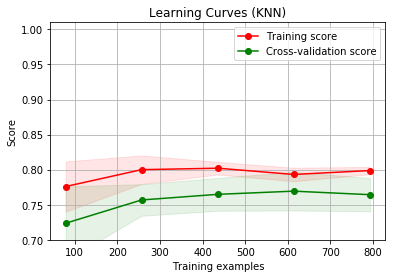

In [17]:
# knn1 = KNeighborsClassifier(n_neighbors=5)
# print(knn1)
# print_classification_report(knn1, X_new, y, 10)
# print("\n")

knn2 = KNeighborsClassifier(n_neighbors=15)
print(knn2)
print_classification_report(knn2, X_new, y, 10)
print("\n")

# title1 = "Learning Curves (KNN 1)"
# estimator1 = knn1
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# plot_learning_curve(estimator1, title1, X_new, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title2 = "Learning Curves (KNN)"
estimator2 = knn2
plot_learning_curve(estimator2, title2, X_new, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

## Logistic Regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy: 0.7611
Precision: 0.7588
Recall: 0.7611
F1: 0.7381
AUC: 0.7964




<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

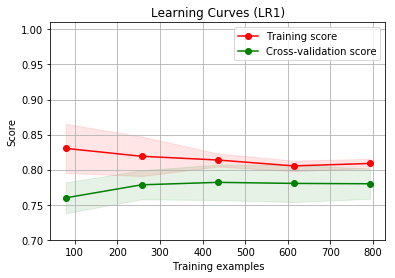

In [18]:
lr1 = LogisticRegression(solver='lbfgs')
print(lr1)
print_classification_report(lr1, X_new, y, 10)
print("\n")

# lr2 = LogisticRegression(solver='liblinear')
# print(lr2)
# print_classification_report(lr2, X_new, y, 10)
# print("\n")

title3 = "Learning Curves (LR1)"
estimator3 = lr1
plot_learning_curve(estimator3, title3, X_new, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

# title4 = "Learning Curves (LR2)"
# estimator4 = lr2
# plot_learning_curve(estimator4, title4, X_new, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
# plt.show()

## Naive Bayes

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
Accuracy: 0.4959
Precision: 0.4461
Recall: 0.4959
F1: 0.4193
AUC: 0.7432




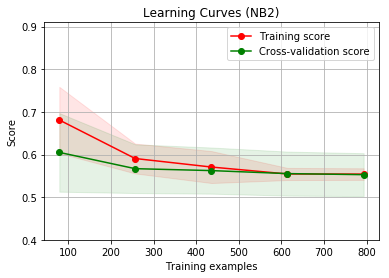

In [19]:
# Ignore UndefinedMetricWarning in precision, recall, F-score in some classifiers
warnings.filterwarnings("ignore")
# nb = GaussianNB()
# print(nb)
# print_classification_report(nb, X_new, y, 10)
# print("\n")

nb2 = BernoulliNB()
print(nb2)
print_classification_report(nb2, X_new, y, 10)
print("\n")

# title5 = "Learning Curves (NB1)"
# estimator5 = nb
# cv1 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# plot_learning_curve(estimator5, title5, X_new, y, ylim=(0.3, 0.71), cv=cv, n_jobs=4)

title6 = "Learning Curves (NB2)"
estimator6 = nb2
plot_learning_curve(estimator6, title6, X_new, y, ylim=(0.4, 0.91), cv=cv, n_jobs=4)
plt.show()

## Support Vector Machine

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy: 0.743
Precision: 0.7453
Recall: 0.743
F1: 0.7303
AUC: 0.7745




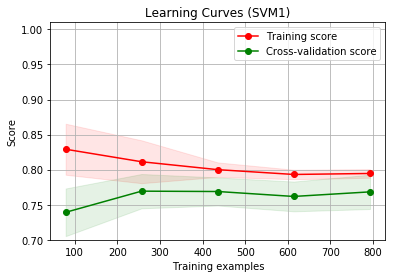

In [20]:
svm1 = svm.SVC(kernel="linear")
print(svm1)
print_classification_report(svm1, X_new, y, 10)
print("\n")

title7 = "Learning Curves (SVM1)"
estimator7 = svm1
plot_learning_curve(estimator7, title7, X_new, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

In [21]:
# svm2 = svm.SVC(kernel="rbf")
# print(svm2)
# print_classification_report(svm2, X_new, y, 10)
# print("\n")

# title72 = "Learning Curves (SVM2)"
# estimator72 = svm2
# plot_learning_curve(estimator72, title72, X_new, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
# plt.show()

## Random Forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy: 0.735
Precision: 0.742
Recall: 0.7381
F1: 0.7403
AUC: 0.7333




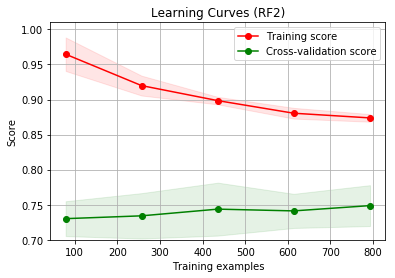

"\niter_options = [100, 200, 300, 400, 500, 1000]\npara_grid = dict(n_estimators=iter_options)\n\ngrid_rf = GridSearchCV(rf, para_grid, cv=10, scoring='accuracy')\ngrid_rf.fit(X, y)\n\n# examine the best model\nprint(grid_rf.best_score_)\nprint(grid_rf.best_params_)\nprint(grid_rf.best_estimator_)\n\n"

In [22]:
# Instantiate model with 1000 decision trees
# rf = RandomForestClassifier(n_estimators=1000)
# print(rf)
# print_classification_report(rf, X_new, y, 10)
# print("\n")

rf2 = RandomForestClassifier(n_estimators=200)
print(rf2)
print_classification_report(rf2, X_new, y, 10)
print("\n")

# title9 = "Learning Curves (RF1)"
# estimator9 = rf
# plot_learning_curve(estimator9, title9, X_new, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title10 = "Learning Curves (RF2)"
estimator10 = rf2
plot_learning_curve(estimator10, title10, X_new, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

"""
iter_options = [100, 200, 300, 400, 500, 1000]
para_grid = dict(n_estimators=iter_options)

grid_rf = GridSearchCV(rf, para_grid, cv=10, scoring='accuracy')
grid_rf.fit(X, y)

# examine the best model
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

"""

## Artifical Neural Network

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100, 100, 100),
       learning_rate='constant', learning_rate_init=0.001, max_iter=10000,
       momentum=0.9, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Accuracy: 0.7541
Precision: 0.76
Recall: 0.7561
F1: 0.7341
AUC: 0.7839




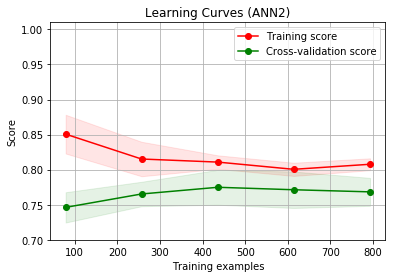

In [23]:
# neural network with three hidden layers( each 10 nodes) and number of iteration is 1000
# mlp1 = MLPClassifier(activation = 'tanh',solver='adam', hidden_layer_sizes=(100,100,100, 100, 100), max_iter=10000)
# print(mlp1)
# print_classification_report(mlp1, X_new, y, 10)
# print("\n")

mlp2 = MLPClassifier(solver='sgd', hidden_layer_sizes=(100,100, 100, 100, 100), max_iter=10000)
print(mlp2)
print_classification_report(mlp2, X_new, y, 10)
print("\n")

# mlp3 = MLPClassifier(solver='adam', hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter=10000)
# print(mlp3)
# print_classification_report(mlp3, X_new, y, 10)
# print("\n")
# title11 = "Learning Curves (ANN1)"
# estimator11 = mlp1
# plot_learning_curve(estimator11, title11, X_new, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title12 = "Learning Curves (ANN2)"
estimator12 = mlp2
plot_learning_curve(estimator12, title12, X_new, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

# title13 = "Learning Curves (ANN3)"
# estimator13 = mlp3
# plot_learning_curve(estimator13, title13, X_new, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

plt.show()